### Motivations and Approach

In [1]:
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl 
mpl.style.use('default')
%matplotlib inline
import seaborn as sns; #sns.set()
from IPython.display import display, HTML

from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.mixture import GaussianMixture
from sklearn import decomposition



#### Load Data

In [163]:
path = "C:/Users/Jenny/Documents/Insight/Data Challenges/breastCancer/"
file = 'breast-cancer-wisconsin.csv'

colnames = ['Sample ID','Clump Thickness','Cell Size Uniformity','Cell Shape Uniformity','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

df = pd.DataFrame()
df = pd.read_csv(path+file,names = colnames,\
                header=None)

df

Sample ID  Clump Thickness  Cell Size Uniformity  Cell Shape Uniformity  \
0      1000025                5                     1                      1   
1      1002945                5                     4                      4   
2      1015425                3                     1                      1   
3      1016277                6                     8                      8   
4      1017023                4                     1                      1   
..         ...              ...                   ...                    ...   
694     776715                3                     1                      1   
695     841769                2                     1                      1   
696     888820                5                    10                     10   
697     897471                4                     8                      6   
698     897471                4                     8                      8   

     Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                    1                            2           1   
1                    5                            7          10   
2                    1                            2           2   
3                    1                            3           4   
4                    3                            2           1   
..                 ...                          ...         ...   
694                  1                            3           2   
695                  1                            2           1   
696                  3                            7           3   
697                  4                            3           4   
698                  5                            4           5   

     Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
694                1                1        1      2  
695                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[699 rows x 11 columns]

####  Inspect DataFrame

In [164]:
# check column names

for i in df.columns:
    print(i)

Sample ID
Clump Thickness
Cell Size Uniformity
Cell Shape Uniformity
Marginal Adhesion
Single Epithelial Cell Size
Bare Nuclei
Bland Chromatin
Normal Nucleoli
Mitoses
Class


In [165]:
# check data type

df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample ID                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Cell Size Uniformity         699 non-null    int64 
 3   Cell Shape Uniformity        699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [166]:
df = df.drop_duplicates()

In [167]:
mean_b_n = df.loc[df['Bare Nuclei'] != '?','Bare Nuclei'].astype(int).mean()

df['Bare Nuclei'] = df['Bare Nuclei'].replace( {'?': mean_b_n})

df['Bare Nuclei'] = df['Bare Nuclei'].astype(str).astype(float).astype(int) 

<ipython-input-167-285c05d69078>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare Nuclei'] = df['Bare Nuclei'].replace( {'?': mean_b_n})
<ipython-input-167-285c05d69078>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare Nuclei'] = df['Bare Nuclei'].astype(str).astype(float).astype(int)


In [168]:
num_cols = [c for c in df.columns.values if 'Sample ID' not in c]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

<ipython-input-168-c500bd332378>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = pd.to_numeric(df[c], errors='coerce')


In [169]:
df.describe()

Sample ID  Clump Thickness  Cell Size Uniformity  \
count  6.910000e+02       691.000000            691.000000   
mean   1.073333e+06         4.426918              3.130246   
std    6.192953e+05         2.815861              3.041328   
min    6.163400e+04         1.000000              1.000000   
25%    8.725490e+05         2.000000              1.000000   
50%    1.171710e+06         4.000000              1.000000   
75%    1.238437e+06         6.000000              5.000000   
max    1.345435e+07        10.000000             10.000000   

       Cell Shape Uniformity  Marginal Adhesion  Single Epithelial Cell Size  \
count             691.000000         691.000000                   691.000000   
mean                3.201158           2.824891                     3.211288   
std                 2.959886           2.866552                     2.199852   
min                 1.000000           1.000000                     1.000000   
25%                 1.000000           1.000000                     2.000000   
50%                 1.000000           1.000000                     2.000000   
75%                 5.000000           4.000000                     4.000000   
max                10.000000          10.000000                    10.000000   

       Bare Nuclei  Bland Chromatin  Normal Nucleoli     Mitoses       Class  
count   691.000000       691.000000       691.000000  691.000000  691.000000  
mean      3.525326         3.435601         2.882779    1.593343    2.688857  
std       3.596356         2.442345         3.066298    1.723129    0.951051  
min       1.000000         1.000000         1.000000    1.000000    2.000000  
25%       1.000000         2.000000         1.000000    1.000000    2.000000  
50%       1.000000         3.000000         1.000000    1.000000    2.000000  
75%       5.000000         5.000000         4.000000    1.000000    4.000000  
max      10.000000        10.000000        10.000000   10.000000    4.000000

#### Impute missing values

In [116]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(df[num_cols])
df[num_cols] = np.round(imp.transform(df[num_cols]))
display(HTML(df.head().to_html()))

<ipython-input-116-3d27f1e43754>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = np.round(imp.transform(df[num_cols]))
C:\Users\Jenny\anaconda3\envs\insight\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Jenny\anaconda3\envs\insight\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [117]:
# make sure there only 2 classes
print(np.unique(df.Class))

[2. 4.]


### Plot summaries

<AxesSubplot:>

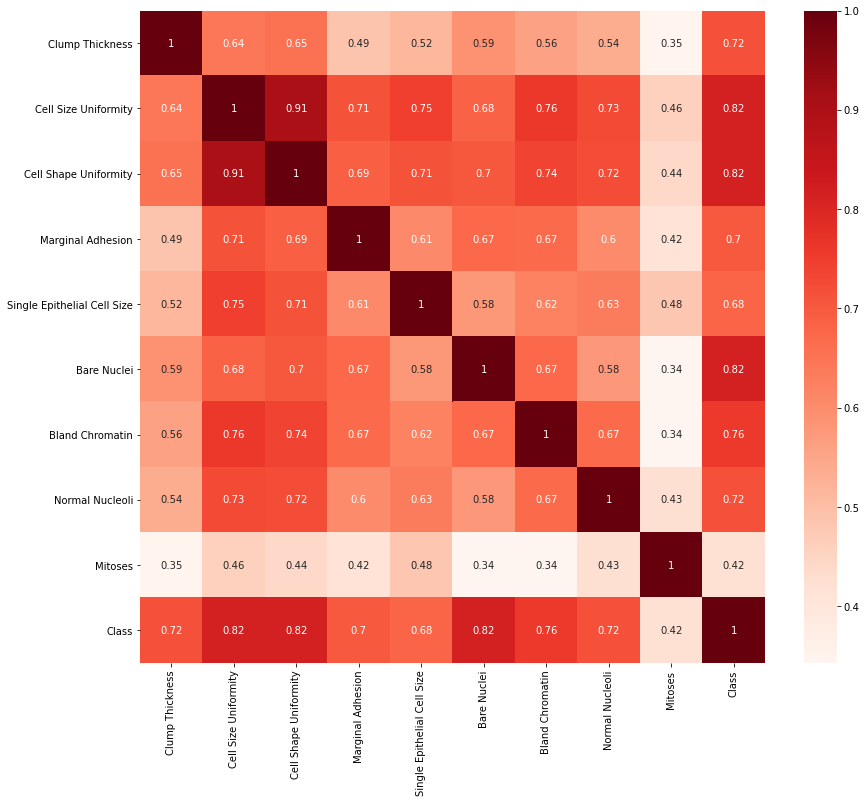

In [60]:
# correlation matrix of features

fig, ax = plt.subplots(figsize = (14,12))
sns.heatmap(df[num_cols].corr(), cmap = 'Reds', annot = True)

- Cell Shape and size uniformity are highly correlated, and so is bland chromatin.
- Mitoses are negatively correlated.

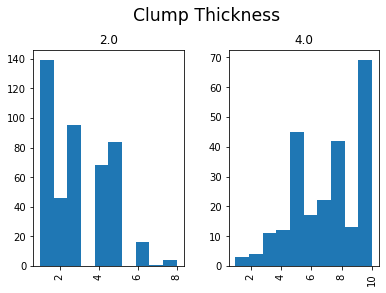

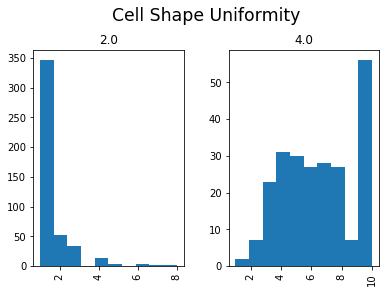

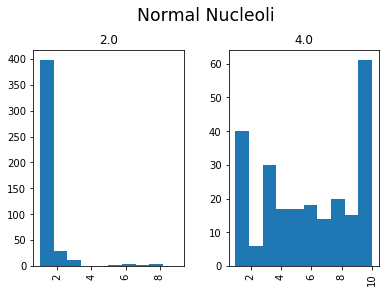

In [112]:
for i in colnames[1:-1]:
    df[i].hist(by=df['Class'])
    plt.suptitle(i, x=0.5, y=1.05, ha='center', fontsize='xx-large')

fig, ax = plt.subplots(figsize = (4,4))  
plt.hist(df[colnames[-1]]);

- begnin has 2x as many as cancerous.
- most features are bit skewed.

### EDA summary and plan

Main drivers seem to be cell shape, bare chromatin with phenotype. Will random forest because it accounts for the slight class imbalance and can get feature importances.

### Make test and training set

In [90]:
from sklearn.model_selection import ShuffleSplit

train_cols = [c for c in num_cols if 'Class' not in c]
split = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 42)

for train_index, test_index in split.split(df[train_cols], df.Class):
    shuff_train = df.iloc[train_index][:]
    shuff_test = df.iloc[test_index][:]

In [95]:
y_train = shuff_train.Class
X_train = shuff_train.drop(colnames[-1], axis = 1)
X_train = X_train.drop('Sample ID', axis = 1)
y_test = shuff_test.Class
X_test = shuff_test.drop('Class', axis = 1)
X_test = X_test.drop('Sample ID', axis = 1)
X_train

Clump Thickness  Cell Size Uniformity  Cell Shape Uniformity  \
270              8.0                   4.0                    7.0   
378              3.0                   1.0                    1.0   
65              10.0                   4.0                    2.0   
294              1.0                   1.0                    1.0   
47               1.0                   1.0                    1.0   
..               ...                   ...                    ...   
388              2.0                   1.0                    1.0   
543              4.0                   1.0                    1.0   
335              1.0                   1.0                    1.0   
151              7.0                   2.0                    4.0   
693              3.0                   1.0                    1.0   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
270                1.0                          3.0         10.0   
378                4.0                          3.0          1.0   
65                 1.0                          3.0          2.0   
294                1.0                          2.0          1.0   
47                 1.0                          2.0          1.0   
..                 ...                          ...          ...   
388                1.0                          2.0          1.0   
543                1.0                          2.0          1.0   
335                1.0                          2.0          1.0   
151                1.0                          6.0         10.0   
693                1.0                          2.0          1.0   

     Bland Chromatin  Normal Nucleoli  Mitoses  
270              3.0              9.0      2.0  
378              2.0              2.0      1.0  
65               4.0              3.0     10.0  
294              2.0              1.0      1.0  
47               2.0              1.0      1.0  
..               ...              ...      ...  
388              2.0              2.0      1.0  
543              2.0              1.0      1.0  
335              1.0              1.0      1.0  
151              5.0              4.0      3.0  
693              2.0              1.0      2.0  

[518 rows x 9 columns]

Scale data

In [96]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print('Scaler mean: ') 
print(scaler.mean_)
print("Scaler scale: ")
print(scaler.scale_)

Scaler mean: 
[4.42664093 3.13899614 3.22972973 2.88996139 3.24131274 3.56949807
 3.45173745 2.83204633 1.57335907]
Scaler scale: 
[2.82457239 3.0415375  3.01145245 2.9338682  2.24418421 3.6621296
 2.46531673 2.99754985 1.74797862]


### Train RF Model

In [97]:
print(X_train.shape, X_test.shape)

(518, 9) (173, 9)


In [98]:
from sklearn.ensemble import RandomForestClassifier
# class_weight = dict({0:1.5})
forest = RandomForestClassifier(n_jobs=-1, 
            bootstrap=True,
            n_estimators=100,
            oob_score=True,random_state=17)

In [99]:
forest_fit = forest.fit(np.array(X_train), y_train)

### Test RF Model


In [100]:
predictions = forest_fit.predict(X_test)
df_pred = pd.DataFrame(X_test)
df_pred['prediction'] = predictions
df_pred['actual'] = y_test
display(HTML(df_pred[:25].to_html()))

#### Validate Results

In [101]:
from sklearn import metrics
mets = metrics.classification_report(y_test, predictions, digits = 3)
print(mets)

              precision    recall  f1-score   support

         2.0      0.982     0.949     0.965       117
         4.0      0.900     0.964     0.931        56

    accuracy                          0.954       173
   macro avg      0.941     0.957     0.948       173
weighted avg      0.956     0.954     0.954       173



In [106]:
cnf = metrics.confusion_matrix (y_test, predictions)

fig, ax = plt.subplots(figsize = (4,4))
sns.heatmap(pd.DataFrame(cnf), annot = True, cmap = 'Spectral', 
            fmt = 'g', annot_kws={"size":16})
ax.set_xlabel ("Predicted Value", fontsize = 18)
ax.set_ylabel ("Actual Value", fontsize = 18)
ax.tick_params (labelsize = 14)
plt.tight_layout()

Model predicted tumor with high accuracy and precision.

### Get Importance

In [102]:
importances = forest_fit.feature_importances_
dfi = pd.DataFrame(importances, index = X_train.columns, 
        columns = ['Importance']).sort_values('Importance', 
        ascending = False)
dfi

Importance
Cell Size Uniformity           0.273525
Cell Shape Uniformity          0.255120
Bare Nuclei                    0.165211
Bland Chromatin                0.122120
Normal Nucleoli                0.067176
Single Epithelial Cell Size    0.044970
Clump Thickness                0.038895
Marginal Adhesion              0.024265
Mitoses                        0.008719

### Summary and Recommendations

Biopsies can be predicted to be malignant with a precision of 98.2% and recall of 96.4%. This means there are few wasted resources that classifies negative biopsies; however, the lower recall means some patients who are potentially at risk are missed; more resources are needed to improve detection (or, potentially use fewer metrics in the model to eliminate noise).

The model indicate that cell shape uniformity, cell shape uniformity, and bare nuclei are best predictors for malignancy. However, cell shape and size are highly correlated, and their distributions are highly similar. Based on the results, the recommendation is to measure cell size uniformity, bare nuclei, and bland chromatin as primary screen for malignancy.